Importamos modulos y archivos necesarios

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy import signal
import numpy as np

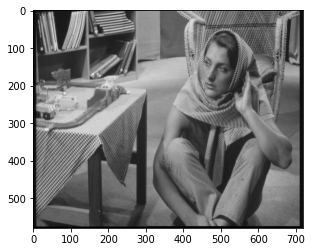

In [ ]:
img = cv2.imread('barbara.jpg') 
plt.imshow(img)

# Spect

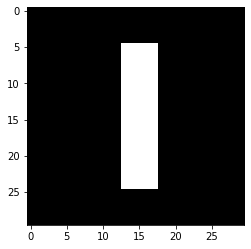

In [ ]:
f = np.zeros((30,30))
f[5:24+1,13:17+1] = 1
plt.imshow(f,cmap='gray') 

Realizamos un plot del modulo del espectro, realizamos zero padding para mejorar la resolucion del espectro

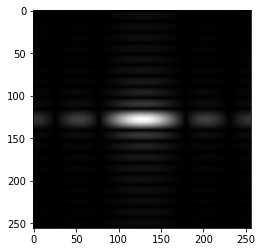

In [ ]:
F = np.fft.fft2(f,s=(256,256)) # padd con zeros, mejora resolucion
F = np.fft.fftshift(F)
module = np.abs(F)
plt.imshow(module,cmap='gray', vmin= module.min(), vmax = module.max()) 

Tiene sentido que tengamos una franja en el sentido vertical mas chica en el espectro ya que tenemos una ancha en el espacio y lo mismo del otro lado. 
Ademas, si realizamos un corte transversal, podemos ver el clasico patron del filtro rectangular, el cual nos daba una sinc

Ploteamos el espectro con colormap= jet

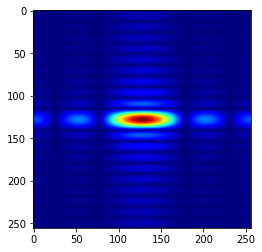

In [ ]:
plt.imshow(module,cmap='jet', vmin= module.min(), vmax = module.max()) 

Ploteamos el logaritmo del valor absoluto para poder tener una mejor percepcion del espectro

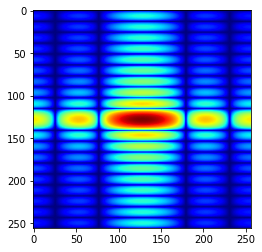

In [ ]:
log_module = np.log10(1+np.abs(F))
plt.imshow(log_module,cmap='jet', vmin= log_module.min(), vmax = log_module.max()) 

Realizamos un plot de la fase del espectro. Vemos que donde hay unas ciertas lineas totalmente verticales u horizontales, es donde se anula la sinc y hay un salto de fase porque pasa de un valor negativo a positivo, lo cual implica un salto de 180 grados, excepto en el medio, donde es positivo y simetrico el espectro. 

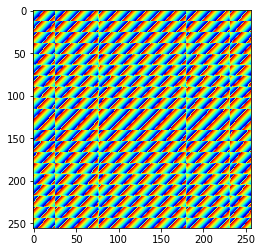

In [ ]:
phase = np.angle(F)
plt.imshow(phase,cmap='jet', vmin= phase.min(), vmax = phase.max()) 